In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date
import matplotlib
from scipy.stats import ttest_ind as ttest


## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-08-14


'2023-08-14'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
EBconc = '[EB] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'


In [4]:
#Type_order = ['None', 'Y64N','R76S','R102S', 'R178L', 'P191R', 'G223E','R303X', 'WT']
Type_order = ['None',  
    'WT', 
    'R76S', 
    'P191R'
             ]
              #P191ag1','P191ag2']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [5]:
black = '#000000'
grey = '#777777'
lightgrey = '#C5C5C5'
darkgrey = '#2A2A2A'
blue = '#23459C'
cyan = '#0089CF'
cyan2 = '#1A54B5'
green = '#79BA1A'
purple = '#AB4A9C'
purple2 = '#58089C'
lily = '#CB81EA'
magenta = '#74155C'
red = '#e60000'
orange = '#FF8341'
darkorange = '#FF5B00'
burntorange = '#973F0F'
lightorange = '#FFAC83'
seafm = '#00E528'
pink='#e468b8'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink2 = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

# palette = [grey, '#69CCFF'
#             , '#E468B8', '#FF8341'
#           ]

palette = [grey,lightgrey,cyan,'#69CCFF']

parameters = [GrowthRate,TimeToNucleate,Lifetime, ShrinkageRate]

[<Color #ab4a9c>, <Color #cd54ae>, <Color #e468b8>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


In [5]:
### font for matplotlib
matplotlib.rcParams['font.family'] = 'Helvetica Neue LT Std'

## Open data if already saved ##

In [6]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Rep,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,1,2023-04-24,Brandi,1,8,0,0,7.169,10.625667,0.674687,0.360812,7.383,NaN,NaN,False,None
1,1,2023-04-24,Brandi,1,8,0,0,6.634,10.040000,0.660757,8.811146,6.634,0.251000,26.430279,False,None
2,1,2023-04-24,Brandi,1,8,0,0,10.272,16.733333,0.613865,2.536146,10.272,0.334667,30.693227,False,None
3,1,2023-04-24,Brandi,1,8,0,0,5.029,9.287000,0.541510,11.655812,5.564,0.167333,33.250996,True,None
4,1,2023-04-24,Brandi,1,8,0,0,4.708,6.860667,0.686231,0.611812,4.387,NaN,NaN,False,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,6,2023-05-16,Brandi,3,8,60,0,6.206,9.287000,0.668246,0.386958,6.206,0.836667,7.417530,False,WT
2316,6,2023-05-16,Brandi,3,8,60,0,8.239,9.370667,0.879233,2.060292,8.774,1.087667,8.066810,True,WT
2317,6,2023-05-16,Brandi,3,8,60,0,13.696,16.147667,0.848172,1.892958,14.552,1.757000,8.282299,True,WT
2318,6,2023-05-16,Brandi,3,8,60,0,14.338,18.155667,0.789726,0.470625,14.552,1.673333,8.696414,False,WT


In [7]:
# frames = [datanoEB, dataEB]

# data = pd.concat(frames)

In [8]:
# data.to_csv(path/(date+'_MasterSheet-complete.csv'), encoding='utf-8', index=True)

In [125]:
data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, 'Rep'])

In [126]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots-Sofia'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/OneDrive - McGill University/EJCB2023/Brandi_EJCB_DCX-EB_Figs/IRM/Data_Sheets/Plots-Sofia/Plots-Sofia')

In [141]:
tubconc =8
dcxtype = 'None'
ebconc = 20
rep = 4
selectdata = data[(data[Type]==dcxtype)&(data[EBconc]==ebconc)]
selectdata.groupby([EBconc,'Rep']).mean()

Ch  [Tubulin] $(\mu M)$  [DCX] $(n M)$  Length $(\mu m)$  \
[EB] $(n M)$ Rep                                                             
0            1     1                    8              0          4.922457   
             2     2                    8              0          3.254583   
             3     1                    8              0          3.207512   
             4     1                    8              0          6.875994   
             5     1                    8              0          4.541725   
20           1     3                    8              0          1.813755   
             2     2                    8              0          2.017782   
             3     2                    8              0          1.616255   
             4     4                    8              0          1.303655   

                  Lifetime $(min)$  Growth Rate $(\mu m / min)$  \
[EB] $(n M)$ Rep                                                  
0            1            8.059174                     0.619193   
             2            7.857694                     0.433031   
             3            7.676255                     0.431407   
             4            8.686578                     0.795359   
             5            7.902250                     0.581588   
20           1            2.127348                     0.910272   
             2            1.800693                     1.168727   
             3            1.748542                     0.935111   
             4            1.459294                     0.916636   

                  Time to Nucleate $(min)$  Shrink Length $(\mu m)$  \
[EB] $(n M)$ Rep                                                      
0            1                    3.156852                 4.957667   
             2                    7.406243                 3.169875   
             3                    4.124961                 3.278016   
             4                    2.432576                 6.897353   
             5                    3.024002                 4.605331   
20           1                    3.643683                 1.806202   
             2                    6.910890                 1.998998   
             3                    4.232253                 1.612601   
             4                    5.616162                 1.361853   

                  Shrink Lifetime $(min)$  Shrink Rate $(\mu m / min)$  \
[EB] $(n M)$ Rep                                                         
0            1                   0.144238                    43.601969   
             2                   0.121096                    26.991193   
             3                   0.107864                    41.764385   
             4                   0.218131                    40.879417   
             5                   0.126635                    39.729840   
20           1                   0.056565                    36.902708   
             2                   0.064168                    42.936469   
             3                   0.081286                    24.592531   
             4                   0.066561                    26.316673   

                   Rescues  
[EB] $(n M)$ Rep            
0            1    0.025641  
             2    0.000000  
             3    0.046512  
             4    0.069767  
             5    0.066667  
20           1    0.023529  
             2    0.000000  
             3    0.000000  
             4    0.010753

In [127]:
df = data.groupby([Type, EBconc ,'Rep']).mean().dropna().reset_index()
df.to_csv(path/(date+'_RepsMean.csv'), encoding='utf-8', index=True)
df

,DCX Type,[EB] $(n M)$,Rep,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,None,0,1,1.0,8.0,0.0,4.922457,8.059174,0.619193,3.156852,4.957667,0.144238,43.601969,0.025641
1,None,0,2,2.0,8.0,0.0,3.254583,7.857694,0.433031,7.406243,3.169875,0.121096,26.991193,0.000000
2,None,0,3,1.0,8.0,0.0,3.207512,7.676255,0.431407,4.124961,3.278016,0.107864,41.764385,0.046512
3,None,0,4,1.0,8.0,0.0,6.875994,8.686578,0.795359,2.432576,6.897353,0.218131,40.879417,0.069767
4,None,0,5,1.0,8.0,0.0,4.541725,7.902250,0.581588,3.024002,4.605331,0.126635,39.729840,0.066667
5,None,20,1,3.0,8.0,0.0,1.813755,2.127348,0.910272,3.643683,1.806202,0.056565,36.902708,0.023529
6,None,20,2,2.0,8.0,0.0,2.017782,1.800693,1.168727,6.910890,1.998998,0.064168,42.936469,0.000000
7,None,20,3,2.0,8.0,0.0,1.616255,1.748542,0.935111,4.232253,1.612601,0.081286,24.592531,0.000000
8,None,20,4,4.0,8.0,0.0,1.303655,1.459294,0.916636,5.616162,1.361853,0.066561,26.316673,0.010753
9,WT,0,1,3.0,8.0,60.0,8.729219,11.691332,0.758012,1.134303,8.691967,1.066595,8.616252,0.222222


In [51]:
# dfmeanstd = data.groupby([Type,EBconc]).aggregate(func=['mean','std','count']).dropna()
# dfmeanstd.to_csv(path/(date+'_meanstd.csv'), encoding='utf-8', index=True)

# dfmeanstd


In [128]:
df_wt =  df[((df[Type] == 'None') | (df[Type] == 'WT'))]

In [129]:
order = [cat for cat in category_Type.categories if df_wt[Type].str.contains(cat).any()]

In [54]:
df_wt

,DCX Type,[EB] $(n M)$,Rep,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues
0,None,0,1,1.0,8.0,0.0,4.922457,8.059174,0.619193,3.156852,4.957667,0.144238,43.601969,0.025641
1,None,0,2,2.0,8.0,0.0,3.254583,7.857694,0.433031,7.406243,3.169875,0.121096,26.991193,0.000000
2,None,0,3,1.0,8.0,0.0,3.207512,7.676255,0.431407,4.124961,3.278016,0.107864,41.764385,0.046512
3,None,0,4,1.0,8.0,0.0,6.875994,8.686578,0.795359,2.432576,6.897353,0.218131,40.879417,0.069767
4,None,0,5,1.0,8.0,0.0,4.541725,7.902250,0.581588,3.024002,4.605331,0.126635,39.729840,0.066667
5,None,20,1,3.0,8.0,0.0,1.813755,2.127348,0.910272,3.643683,1.806202,0.056565,36.902708,0.023529
6,None,20,2,2.0,8.0,0.0,2.017782,1.800693,1.168727,6.910890,1.998998,0.064168,42.936469,0.000000
7,None,20,3,2.0,8.0,0.0,1.616255,1.748542,0.935111,4.232253,1.612601,0.081286,24.592531,0.000000
8,None,20,4,4.0,8.0,0.0,1.303655,1.459294,0.916636,5.616162,1.361853,0.066561,26.316673,0.010753
9,WT,0,1,3.0,8.0,60.0,8.729219,11.691332,0.758012,1.134303,8.691967,1.066595,8.616252,0.222222


In [55]:
df[Type].unique()

[None, WT, R76S, P191R]
Categories (4, object): [None < WT < R76S < P191R]

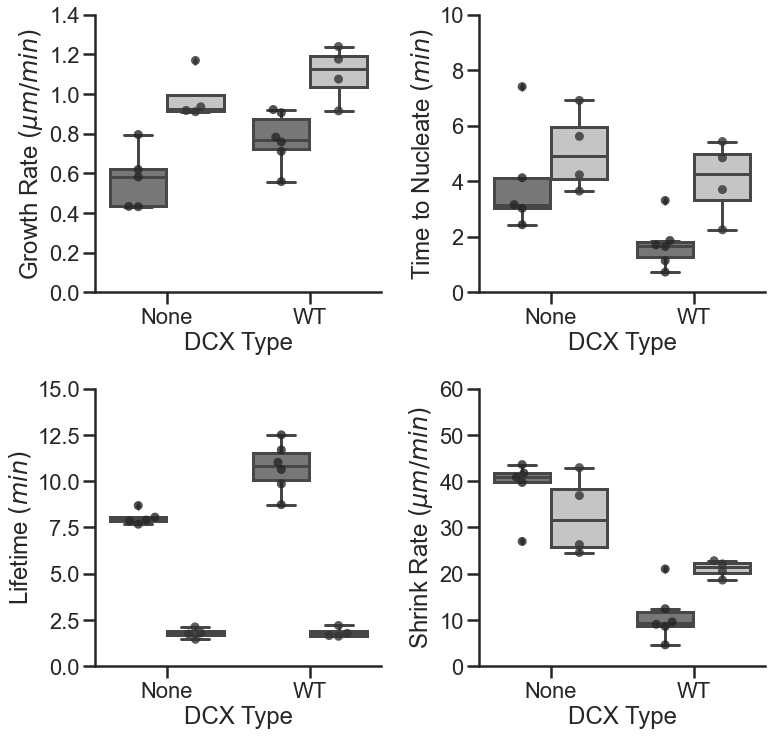

In [130]:
fig, axs = plt.subplots(2,2,figsize=(11.25,10.75))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.boxplot(x=Type, y=parameters[c],hue=EBconc, order = order, palette = palette,
                    dodge = True, data=df_wt,ax=axs[i][j])
        sns.swarmplot(x=Type, y=parameters[c],hue=EBconc,dodge = True, color=".2", marker='o', alpha = 0.8, order = order,
                      data=df_wt , size=9,ax=axs[i][j])
        
        axs[i][j].legend([],[], frameon=False)
        
        c += 1
axs[0][0].set_ylim(0,1.4)
axs[0][0].set_yticks(np.arange(0, 1.51, 0.2))
axs[1][0].set_ylim(0,15)
axs[1][0].set_yticks(np.arange(0, 15.1, 2.5))
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,60)

sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

#plt.savefig(path/('tub8uM_WTDCX-variable'+date+'.tiff'))
#plt.savefig(path/('tub8uM_WTDCX-variableBAR'+date+'.svg'),backend='Cairo')
#plt.savefig(path/('tub8uM_WTDCX-variableBAR'+date+'.pdf'),dpi=300)


In [19]:
path

WindowsPath('D:/Sofia/OneDrive - McGill University/EJCB2023/Brandi_EJCB_DCX-EB_Figs/IRM/Data_Sheets/Plots-Sofia/Plots-Sofia')

C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Brouhard Lab\AppData\Roaming\Python\Python37\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


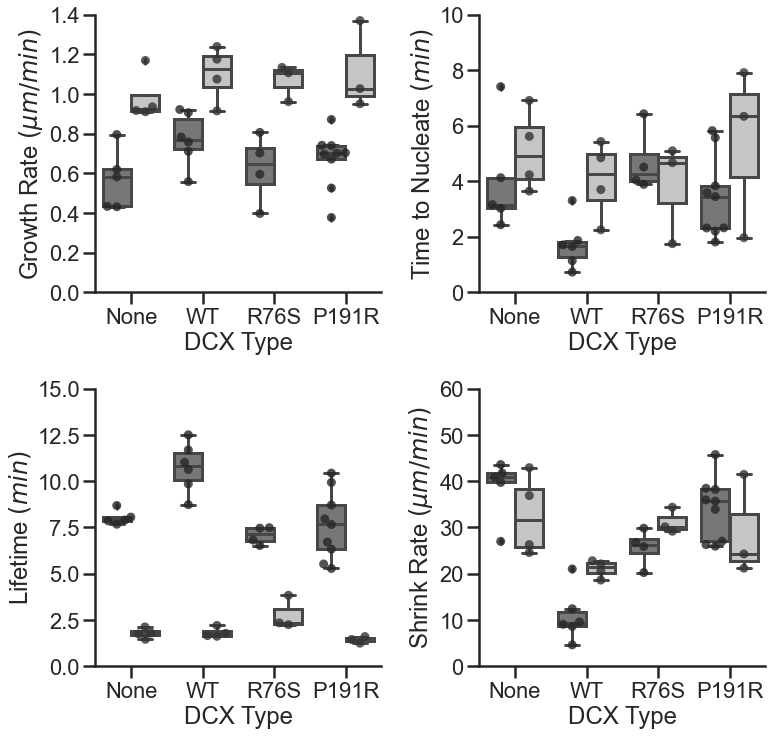

In [18]:
fig, axs = plt.subplots(2,2,figsize=(11.25,10.75))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.boxplot(x=Type, y=parameters[c],hue=EBconc, palette = palette,
                    dodge = True, data=df,ax=axs[i][j])
        sns.swarmplot(x=Type, y=parameters[c],hue=EBconc,dodge = True, color=".2", marker='o', alpha = 0.8,
                      data=df , size=9,ax=axs[i][j])
        
        axs[i][j].legend([],[], frameon=False)
        
        c += 1
axs[0][0].set_ylim(0,1.4)
axs[0][0].set_yticks(np.arange(0, 1.51, 0.2))
axs[1][0].set_ylim(0,15)
axs[1][0].set_yticks(np.arange(0, 15.1, 2.5))
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,60)



sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()

# plt.savefig(path/('tub8uM_WTDCX-variable'+date+'.tiff'))
#plt.savefig(path/('tub8uM_allDCX-variableBAR'+date+'.svg'),backend='Cairo')


In [57]:
def filter_rep(typename, ebconc, parameter):
    return df[(df[Type]== typename) & (df[EBconc]== ebconc)][parameter].values

In [58]:
x1 = filter_rep('None', 0, parameters[0])
x2 = filter_rep('WT', 0, parameters[0])

In [59]:
ttest(x1, x2, equal_var=False)

Ttest_indResult(statistic=-3.067285520845343, pvalue=0.01929446821780452)

In [60]:
def t_test_pandas(typename1,typename2, ebconc1 , ebconc2, parameter):
    x1 = filter_rep(typename1, ebconc1, parameter)
    x2 = filter_rep(typename2, ebconc2, parameter)
    
    stat,tt =  ttest(x1, x2, equal_var=False)
    
    star = 0
    
    if tt > 0.05:
        star = 0
    if tt <= 0.05:
        star = 1
    if tt <= 0.01:
        star = 2
    if tt <= 0.001:
        star = 3
    if tt <= 0.0001:
        star = 4
    
    d = {Type+' 1': [typename1], EBconc+' 1': [ebconc1] ,
         Type+' 2': [typename2], EBconc+' 2': [ebconc2] , 'Parameter': [parameter], 'T-test p-value': [tt], 'Star': [star]}
    df = pd.DataFrame(data=d)
    
    return df

In [62]:
#parameters = [GrowthRate,TimeToNucleate,Lifetime, ShrinkageRate]
t_test_pandas('None','WT', 0 , 0, parameters[1])

,DCX Type 1,[EB] $(n M)$ 1,DCX Type 2,[EB] $(n M)$ 2,Parameter,T-test p-value,Star
0,None,0,WT,0,Time to Nucleate $(min)$,0.040208,1


In [24]:
results = pd.DataFrame(columns=[] , index=[])
typeunique =  df[Type].unique()
ebunique = df[EBconc].unique()
for c in parameters:
    for i in np.arange(len(typeunique)):
        for j in np.arange(len(typeunique)):
            for k in np.arange(len(ebunique)):
                for l in np.arange(len(ebunique)):
        
                    ttdf = t_test_pandas(df[Type].unique()[i],df[Type].unique()[j], df[EBconc].unique()[k] , df[EBconc].unique()[l], c)
            
                    results = pd.concat([results, ttdf], sort=False)
            

In [25]:
results.to_csv(path/(date+'_ttest_pvalue_star.csv'), encoding='utf-8', index=True)
results

,DCX Type 1,[EB] $(n M)$ 1,DCX Type 2,[EB] $(n M)$ 2,Parameter,T-test p-value,Star
0,None,0,None,0,Growth Rate $(\mu m / min)$,1.000000,0
0,None,0,None,20,Growth Rate $(\mu m / min)$,0.002929,2
0,None,20,None,0,Growth Rate $(\mu m / min)$,0.002929,2
0,None,20,None,20,Growth Rate $(\mu m / min)$,1.000000,0
0,None,0,WT,0,Growth Rate $(\mu m / min)$,0.049366,1
...,...,...,...,...,...,...,...
0,P191R,20,R76S,20,Shrink Rate $(\mu m / min)$,0.759264,0
0,P191R,0,P191R,0,Shrink Rate $(\mu m / min)$,1.000000,0
0,P191R,0,P191R,20,Shrink Rate $(\mu m / min)$,0.506242,0
0,P191R,20,P191R,0,Shrink Rate $(\mu m / min)$,0.506242,0


## N

In [11]:
#Expts = df.groupby(['Courses','Fee']).count()
reps = data.groupby([Type, EBconc]).count()
reps

Rep  Date  Investigator   Ch  [Tubulin] $(\mu M)$  \
DCX Type [EB] $(n M)$                                                      
None     0             297   297           297  297                  297   
         20            314   314           314  314                  314   
WT       0             300   300           300  300                  300   
         20            231   231           231  231                  231   
R76S     0             230   230           230  230                  230   
         20            249   249           249  249                  249   
P191R    0             492   492           492  492                  492   
         20            207   207           207  207                  207   

                       [DCX] $(n M)$  Length $(\mu m)$  Lifetime $(min)$  \
DCX Type [EB] $(n M)$                                                      
None     0                       297               297               297   
         20                      314               314               314   
WT       0                       300               300               300   
         20                      231               231               231   
R76S     0                       230               230               230   
         20                      249               249               249   
P191R    0                       492               492               492   
         20                      207               207               207   

                       Growth Rate $(\mu m / min)$  Time to Nucleate $(min)$  \
DCX Type [EB] $(n M)$                                                          
None     0                                     297                       297   
         20                                    314                       314   
WT       0                                     300                       300   
         20                                    231                       231   
R76S     0                                     230                       230   
         20                                    249                       249   
P191R    0                                     492                       492   
         20                                    207                       207   

                       Shrink Length $(\mu m)$  Shrink Lifetime $(min)$  \
DCX Type [EB] $(n M)$                                                     
None     0                                 297                      248   
         20                                314                      237   
WT       0                                 300                      299   
         20                                231                      206   
R76S     0                                 230                      210   
         20                                249                      176   
P191R    0                                 492                      442   
         20                                207                      162   

                       Shrink Rate $(\mu m / min)$  Rescues  
DCX Type [EB] $(n M)$                                        
None     0                                     248      297  
         20                                    237      314  
WT       0                                     299      300  
         20                                    206      231  
R76S     0                                     210      230  
         20                                    176      249  
P191R    0                                     442      492  
         20                                    162      207

## Statistical Tests

In [10]:
#Select data for stats comparison

def stats_hist(data, tubconc, dcxtype, dcxconc, ebconc, parameter) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[EBconc]==ebconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)]
    return selectdata[parameter]

In [124]:
#Mann-whitney (non-parametrical testing)

x3 = stats_hist(data, 8, 'None', 0, 0, ShrinkageRate).dropna()
x4 = stats_hist(data, 8, 'None', 0, 20, ShrinkageRate).dropna()
sp.stats.mannwhitneyu(x3,x4)


MannwhitneyuResult(statistic=33891.5, pvalue=0.0035140609906812482)

In [108]:
#Kruskal-Wallis (non-parametrical, requires post-hoc Dunn's test)
from scipy import stats
x4 = stats_hist(data, 8, 'WT', 60, 0, Lifetime)
x5 = stats_hist(data, 8, 'R76S', 60, 0, Lifetime)
y4 = stats_hist(data, 8, 'WT', 60, 20, Lifetime)
# y5 = stats_hist(data, 8, 'R76S', 60, 20, Lifetime)

stats.kruskal(x4,x5,y4)

KruskalResult(statistic=nan, pvalue=nan)

In [72]:
# Perform Dunn's Test
df = [x4,x5, y4]
dunn_results = sph.posthoc_dunn(df, p_adjust = 'bonferroni')
print(dunn_results)

              1             2             3
1  1.000000e+00  2.495068e-05  1.166502e-59
2  2.495068e-05  1.000000e+00  5.098276e-12
3  1.166502e-59  5.098276e-12  1.000000e+00


In [15]:
x1 = stats_hist(data, 8, 'WT', 0, 0, TimeToNucleate)
x2 = stats_hist(data, 8, 'WT', 60, 0, TimeToNucleate)
ztest(x1, x2)

C:\Users\Brandi\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:1543: RuntimeWarning: Mean of empty slice.
  x1_mean = x1.mean(0)
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Brandi\anaconda3\lib\site-packages\statsmodels\stats\weightstats.py:1544: RuntimeWarning: Degrees of freedom <= 0 for slice
  x1_var = x1.var(0)
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Brandi\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


ZeroDivisionError: float division by zero

In [114]:
data[ShrinkageRate].dropna()

0      189.274900
1      150.908366
2      144.513944
3      143.235060
4      136.840638
          ...    
872      3.911884
873      3.836653
876      3.197211
877      2.717629
878      2.344622
Name: Shrink Rate $(\mu m / min)$, Length: 879, dtype: float64

# Fitting Data #

In [7]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [89]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc,ebconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    
    maxbin = selectdata[parameter].max()
    
    if np.isnan(maxbin) == True:
        return [np.nan],[np.nan]
    
    elif parameter == GrowthRate :
        binsize = 0.05
    elif parameter == ShrinkageRate :
        binsize = 0.5
    else:
        binsize = 1

    binarange = np.arange(0, maxbin + binsize, binsize)
    
    n, bins, patches = plt.hist(selectdata[parameter], bins=binarange, density=True);
    plt.clf()
       
    return n, bins

In [90]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc,ebconc)      

                    if np.isnan(np.sum(n)) == True:
                        continue

                    if equation == gamma :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                    else :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                    variance = np.diagonal(var_matrix) #Refer [3]
                    SE = np.sqrt(variance) #Refer [4]

                #======Making a data frame========
                    results0 = pd.DataFrame(columns=[] , index=[])
                    
                    for k in np.arange(0,len(coeff)):
                        
                        r0 = pd.DataFrame([[coeff[k],SE[k]],],columns=['Fit', 'SE'])
                        r0['Coefficient'] = k
                        results0 = pd.concat([results0, r0], sort=False)
                        
#                     for k in np.arange(0,len(coeff)):
#                         header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
#                         r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
#                         results0 = pd.concat([results0, r0], axis=1, sort=False)

                    results0[tubulin] = tubconc
                    results0[Type] = dcxtype
                    results0[DCXconc] = dcxconc
                    results0[EBconc] = ebconc
                    results0['Parameter'] = parameter

                    results = pd.concat([results, results0], sort=False)

    return results

In [91]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/Brouhard Lab/OneDrive - McGill University/EJCB2023/Brandi_EJCB_DCX-EB_Figs/IRM/Data_Sheets/Plots-Sofia/Plots-Sofia/2023-08-14_fitdata')

In [92]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in power
  


<Figure size 432x288 with 0 Axes>

In [93]:
GrowthRateFit['Moment'] = GrowthRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')
TimeToNucleateFit['Moment'] = 'Mean'
ShrinkageRateFit['Moment'] = ShrinkageRateFit['Coefficient'].apply(lambda x: 'Mean' if x == 0 else 'Std')

In [94]:
LifetimeCoeff0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['Fit'].values
LifetimeCoeff1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['Fit'].values
LifetimeSE0 = LifetimeFit[(LifetimeFit['Coefficient']==0)]['SE'].values
LifetimeSE1 = LifetimeFit[(LifetimeFit['Coefficient']==1)]['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = np.sqrt(np.square(LifetimeCoeff0*LifetimeSE1) + np.square(LifetimeCoeff1*LifetimeSE0))
LifetimeSE

array([0.74633123, 0.72526586, 1.37004492, 0.73565695, 1.08611027,
       0.60643988, 0.6326354 , 0.84157821])

In [95]:
LTmeandf = LifetimeFit[(LifetimeFit['Coefficient']==0)]
LTmeandf['Fit'] = LifetimeMean
LTmeandf['SE'] = LifetimeSE
LTmeandf['Coefficient'] = np.NaN
LTmeandf['Moment'] = 'Mean'
LTmeandf

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,7.444276,0.746331,NaN,8,None,0,0,Lifetime $(min)$,Mean
0,1.262165,0.725266,NaN,8,None,0,20,Lifetime $(min)$,Mean
0,10.593890,1.370045,NaN,8,WT,60,0,Lifetime $(min)$,Mean
0,1.244813,0.735657,NaN,8,WT,60,20,Lifetime $(min)$,Mean
0,6.356580,1.086110,NaN,8,R76S,60,0,Lifetime $(min)$,Mean
0,2.214608,0.606440,NaN,8,R76S,60,20,Lifetime $(min)$,Mean
0,6.901113,0.632635,NaN,8,P191R,60,0,Lifetime $(min)$,Mean
0,0.997387,0.841578,NaN,8,P191R,60,20,Lifetime $(min)$,Mean


In [96]:
ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LTmeandf,ShrinkageRateFit], axis=0, sort=False)
ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.558523,0.013746,0.0,8,None,0,0,Growth Rate $(\mu m / min)$,Mean
0,0.171822,0.011224,1.0,8,None,0,0,Growth Rate $(\mu m / min)$,Std
0,0.903309,0.011887,0.0,8,None,0,20,Growth Rate $(\mu m / min)$,Mean
0,0.183414,0.009706,1.0,8,None,0,20,Growth Rate $(\mu m / min)$,Std
0,0.734355,0.008163,0.0,8,WT,60,0,Growth Rate $(\mu m / min)$,Mean
...,...,...,...,...,...,...,...,...,...
0,12.363740,0.877892,1.0,8,R76S,60,20,Shrink Rate $(\mu m / min)$,Std
0,24.783394,0.690816,0.0,8,P191R,60,0,Shrink Rate $(\mu m / min)$,Mean
0,14.294820,0.574056,1.0,8,P191R,60,0,Shrink Rate $(\mu m / min)$,Std
0,24.438039,0.853727,0.0,8,P191R,60,20,Shrink Rate $(\mu m / min)$,Mean


#  Open saved fit parameters  #

In [16]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to t
# the selected file
ResultFit = pd.read_csv(askFitParam, encoding='utf-8')
ResultFit

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,0.558523,0.012726,0.0,8,None,0,0,Growth Rate $(\mu m / min)$,Mean
1,0.171823,0.010391,1.0,8,None,0,0,Growth Rate $(\mu m / min)$,Std
2,0.902572,0.013810,0.0,8,None,0,20,Growth Rate $(\mu m / min)$,Mean
3,0.180768,0.011278,1.0,8,None,0,20,Growth Rate $(\mu m / min)$,Std
4,0.734345,0.007398,0.0,8,WT,60,0,Growth Rate $(\mu m / min)$,Mean
...,...,...,...,...,...,...,...,...,...
59,6.741942,0.860327,1.0,8,R76S,60,20,Shrink Rate $(\mu m / min)$,Std
60,20.295104,0.772681,0.0,8,P191R,60,0,Shrink Rate $(\mu m / min)$,Mean
61,7.060160,0.621615,1.0,8,P191R,60,0,Shrink Rate $(\mu m / min)$,Std
62,21.921708,1.231168,0.0,8,P191R,60,20,Shrink Rate $(\mu m / min)$,Mean


#  PLOT DATA  #

In [97]:
plotLT = ResultFit[(ResultFit['Parameter']==Lifetime) & (ResultFit['Moment']=='Mean')]
plotLT

,Fit,SE,Coefficient,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Parameter,Moment
0,7.444276,0.746331,NaN,8,None,0,0,Lifetime $(min)$,Mean
0,1.262165,0.725266,NaN,8,None,0,20,Lifetime $(min)$,Mean
0,10.593890,1.370045,NaN,8,WT,60,0,Lifetime $(min)$,Mean
0,1.244813,0.735657,NaN,8,WT,60,20,Lifetime $(min)$,Mean
0,6.356580,1.086110,NaN,8,R76S,60,0,Lifetime $(min)$,Mean
0,2.214608,0.606440,NaN,8,R76S,60,20,Lifetime $(min)$,Mean
0,6.901113,0.632635,NaN,8,P191R,60,0,Lifetime $(min)$,Mean
0,0.997387,0.841578,NaN,8,P191R,60,20,Lifetime $(min)$,Mean


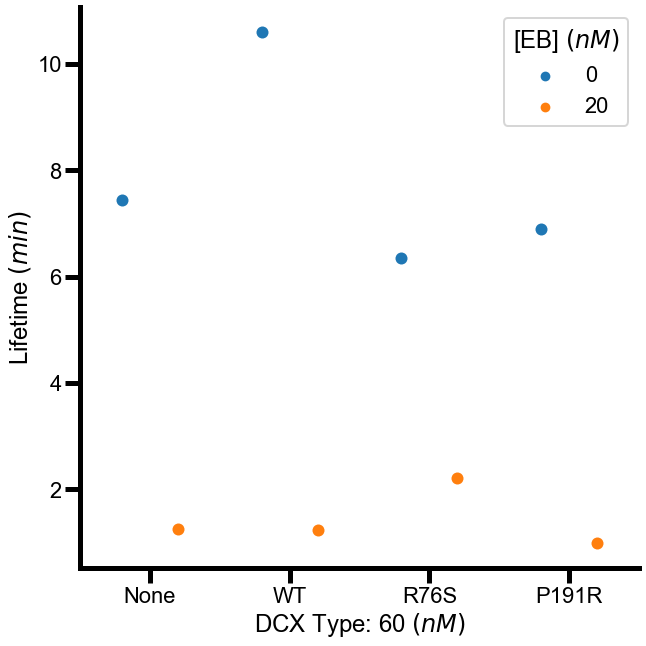

In [98]:
fig, ax = plt.subplots(1,1,figsize=(10,10))

#rect = 0,0,1,1 # create an rectangle for the new axis
#log_ax = fig.add_axes(rect) # create a new axis (or use an existing one)
#log_ax.set_xscale("log") # log first

#ax = sns.boxplot(x= taxol, y='Expansion %', data=finalData, whis=np.inf, palette='Blues',linewidth=3)
ax = sns.swarmplot(x=Type, y='Fit',hue=EBconc, data=plotLT,dodge=True, size=12)

# ax.axhline(y = nogales2018, color = lightorange ,linestyle="--", linewidth=5.5, label='GDP'r'$\rightarrow$''GMPCPP \n Zhang (2018)')
# #plt.xlim(0.1,10)

# ax.set_ylim(-0.5,4)
# ax.legend( loc = 'lower right')
# #ax.legend('')
ax.set_ylabel(Lifetime)
ax.set_xlabel('DCX Type: 60 ' r'$(n M)$')

sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


#plt.savefig(path/('expansion_'+date_today+'.svg'))

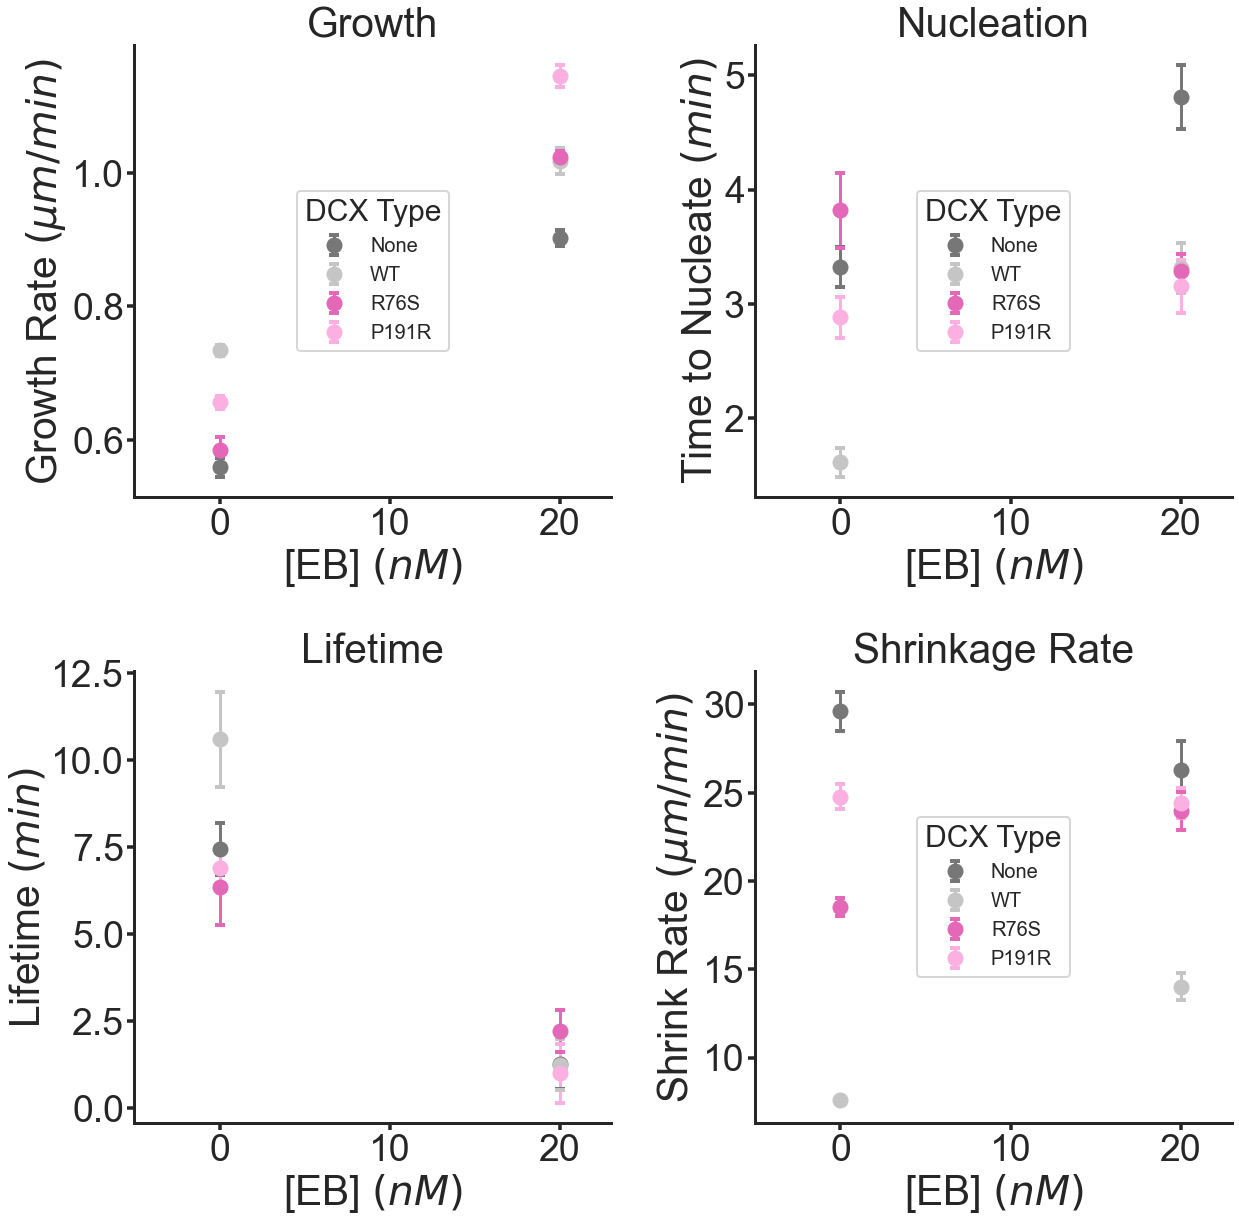

In [99]:
scattersize = 12
cap = 5

parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

fig, ax = plt.subplots(2,2,figsize=(18,18))

count = 0
for dcxtype in ResultFit[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')]
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
    
            parameterMeanDF = dcxtype_DF[dcxtype_DF['Parameter']==parameters[c]]

            x = parameterMeanDF[EBconc].values
            y = parameterMeanDF['Fit'].values
            
            yerr = parameterMeanDF['SE'].values
            
            ax[i][j].errorbar(x , y , yerr= yerr , fmt=' ',marker='o', markersize=scattersize,capsize = cap,
                                          markeredgewidth=4,  alpha = 1 ,color=palette[count])

            c += 1

    count += 1

# ax[0][0].set_ylim(0,1)
# ax[1][0].set_ylim(0,18)
# ax[0][1].set_ylim(0,10)
# ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,23)
        ax[i][j].set_xlabel(EBconc)
        #ax[i][j].set_xticks(np.arange(0, 23, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        ax[i][1].legend((Type_order),loc='center', title='DCX Type', title_fontsize=30, fontsize=20)
        ax[i][j].set_title(titles[count])
       
        
        count += 1

ax[0][0].legend((Type_order),loc='center',title='DCX Type', title_fontsize=30, fontsize=20)
plt.tight_layout()

plt.savefig(path/('tub08uM_fit_'+date+'.png'))

# Histogram #

In [144]:
def plot_hist(data, dcxtype,ebconc,color) :
    
    selectdata = data[(data[Type]==dcxtype)&(data[EBconc]==ebconc)]
    fig, ax = plt.subplots(2,2,figsize=(11.2,11))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 2
                binsize = 0.05
            elif parameter == ShrinkageRate :
                maxbin = 100
                binsize = 0.5
            else:
                maxbin = 30
                binsize = 1

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,histtype='stepfilled',color = color,alpha = 0.4);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability Density')
            ax[i][j].set_xlim(0,maxbin)
            ax[0][0].set_xticks(np.arange(0, 2.2, 0.5))
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit.dropna(subset=['Coefficient'])
    selectcoeff=selectcoeff[(selectcoeff[tubulin]==tubconc) & (selectcoeff[Type]==dcxtype) 
                            & (selectcoeff[DCXconc]==dcxconc)& (selectcoeff[EBconc]==ebconc)]
    
    x = np.arange(0, 2 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[0]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[1]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    scale = selectcoeff[(selectcoeff['Parameter']==parameters[2]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
    
    x = np.arange(0, 100 + 0.5, 0.5)
    mu = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==0)]['Fit'].values
    sig = selectcoeff[(selectcoeff['Parameter']==parameters[3]) & (selectcoeff['Coefficient']==1)]['Fit'].values
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
#     legnd = str(ebconc)+' nM'
#     ax[0][1].legend(('Fit',legnd),loc='upper right',title='EB3')
#     ax[1][0].legend(('Fit',legnd),loc='upper right',title='EB3')
    
    ax[0][0].set_ylim(0,4)
    ax[1][0].set_ylim(0,0.8)
    ax[0][1].set_ylim(0,0.6)
    ax[1][1].set_ylim(0,0.2)
    
    sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
    plt.tight_layout()
    #plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'+EB-'+str(ebconc)+'.svg'))
    
    return print(n)

In [145]:
grey00 = '#777777'
grey20 = '#C5C5C5'
cyan00 = '#0089CF'  
cyan20 = '#65CBFF'
pink00 = '#e468b8'
pink20 = '#FBB0E1'
orange00 = '#ff8341'
orange20 = '#FFC6A8'


237


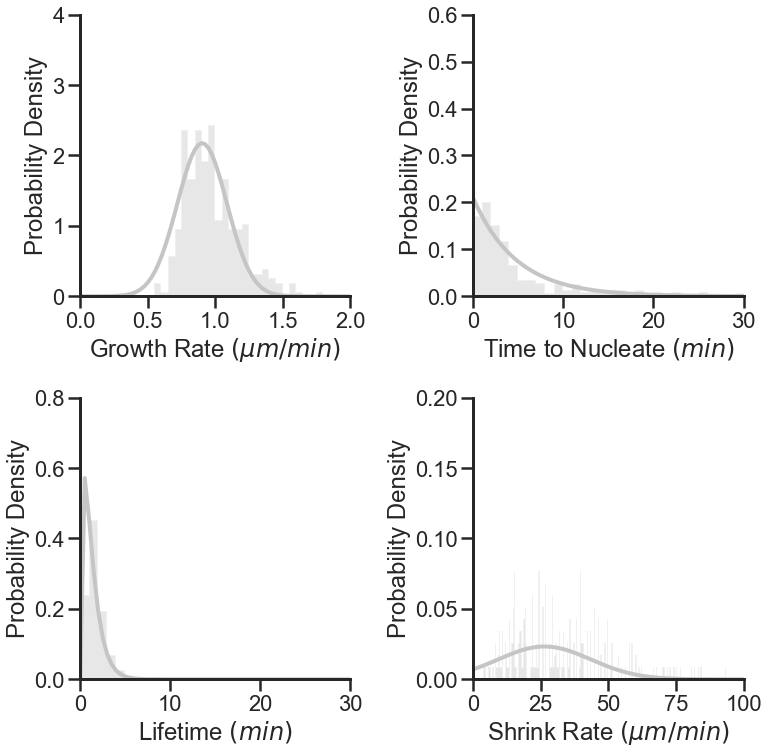

In [146]:
#plot_hist(data, dcxtype,ebconc,color)
plot_hist(data,'None',20,grey20)

248


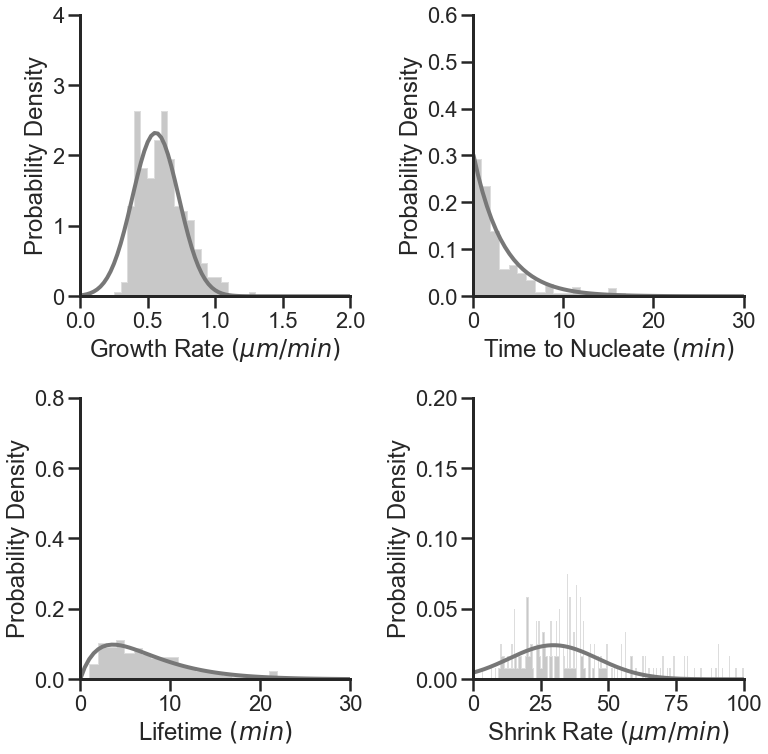

In [147]:
plot_hist(data,'None',0,grey00)

In [30]:
selectdata[parameter].max()

85.68525896

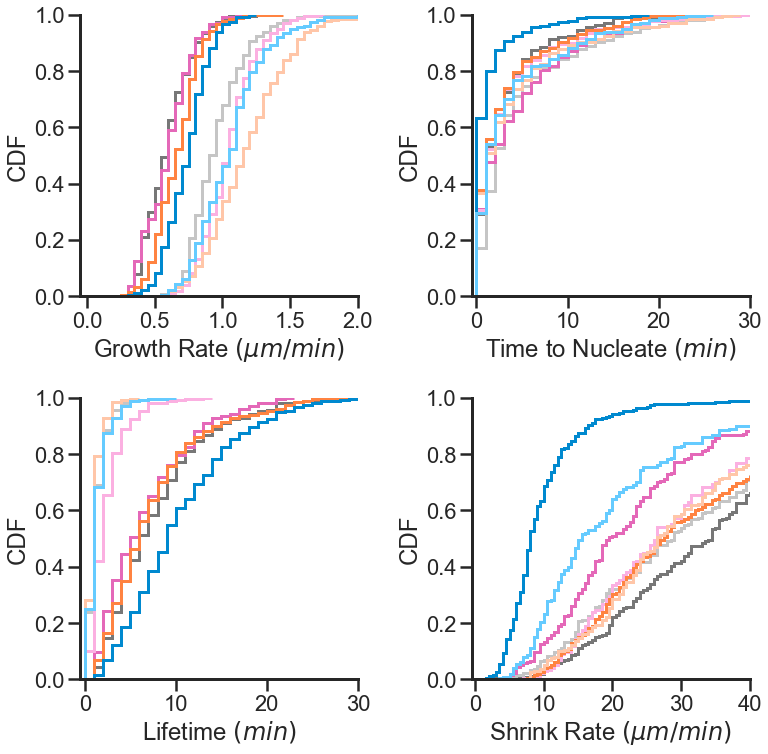

In [148]:
fig, ax = plt.subplots(2,2,figsize=(11.2,11))
count = 0

palette = [grey00, grey20,pink00,pink20,orange00,orange20, cyan00,cyan20] #[grey00, grey20,pink00,pink20,orange00,orange20, cyan00,cyan20] #[grey00, grey20, cyan00,cyan20]

for dcxtype in ['None','R76S','P191R','WT']: #data[Type].unique(): #['None','R76S','P191R','WT'] #['None','WT']
    for ebconc in [0,20]:

        #dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Moment']=='Mean')& (ResultFit[tubulin]==6)]

        selectdata = data[(data[tubulin]==8)&(data[Type]==dcxtype)&(data[EBconc]==ebconc)]
        
        #print(dcxtype,ebconc)

        #n = len(selectdata.dropna().index)

        c=0
        for i in np.arange(len(ax)):
            for j in np.arange(len(ax)):
                parameter = parameters[c]
                maxbin = selectdata[parameter].max()

                if parameter == GrowthRate :
                    binsize = 0.05
                elif parameter == ShrinkageRate :
                    binsize = 0.5
                else:
                    binsize = 1

                n,bins,patches = ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                              cumulative=True, density=True,histtype='step',color =palette[count],alpha = 1,linewidth=3);
                patches[0].set_xy(patches[0].get_xy()[:-1])
                
                
                ax[i][j].set_xlabel(parameter)
                ax[i][j].set_ylabel('CDF')
                ax[i][j].set_ylim(0,1)
                ax[i][j].set_xlim(-0.5,30)
                
                ax[i][j].spines['right'].set_visible(False)
                ax[i][j].spines['top'].set_visible(False)
                ax[i][j].spines['left'].set_lw(3)
                ax[i][j].spines['bottom'].set_lw(3)

                c += 1
        #print(palette[count]) 
        count += 1
ax[0][0].set_xlim(-0.05,2)
ax[0][0].set_xticks(np.arange(0, 2.01, 0.5))
ax[1][1].set_xlim(-0.5,40)
ax[1][1].set_xticks(np.arange(0, 40.01, 10))

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(newmydir/('joint_graphsCDF_WT-2mutants.svg'))


## Reproducibility ##

In [173]:
tubconc =8
dcxtype = 'WT'
dcxconc = 60
ebconc = 0
selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]

In [174]:
selectdata

,Rep,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
1789,1,2023-04-24,Brandi,3,8,60,0,0.820333,1.422333,0.576752,1.805806,0.7490,0.139444,5.371323,0.0,WT
1790,1,2023-04-24,Brandi,3,8,60,0,5.671000,8.073833,0.702393,0.355583,5.5105,0.711167,7.748535,0.0,WT
1791,1,2023-04-24,Brandi,3,8,60,0,2.835500,6.065833,0.467454,0.271917,2.9425,0.167333,17.584661,0.0,WT
1792,1,2023-04-24,Brandi,3,8,60,0,2.835500,3.890500,0.728827,0.313750,2.9425,0.125500,23.446215,0.0,WT
1793,1,2023-04-24,Brandi,3,8,60,0,6.741000,10.960333,0.615036,0.397417,6.3130,0.334667,18.863546,0.0,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2315,6,2023-05-16,Brandi,3,8,60,0,6.206000,9.287000,0.668246,0.386958,6.2060,0.836667,7.417530,0.0,WT
2316,6,2023-05-16,Brandi,3,8,60,0,8.239000,9.370667,0.879233,2.060292,8.7740,1.087667,8.066810,1.0,WT
2317,6,2023-05-16,Brandi,3,8,60,0,13.696000,16.147667,0.848172,1.892958,14.5520,1.757000,8.282299,1.0,WT
2318,6,2023-05-16,Brandi,3,8,60,0,14.338000,18.155667,0.789726,0.470625,14.5520,1.673333,8.696414,0.0,WT


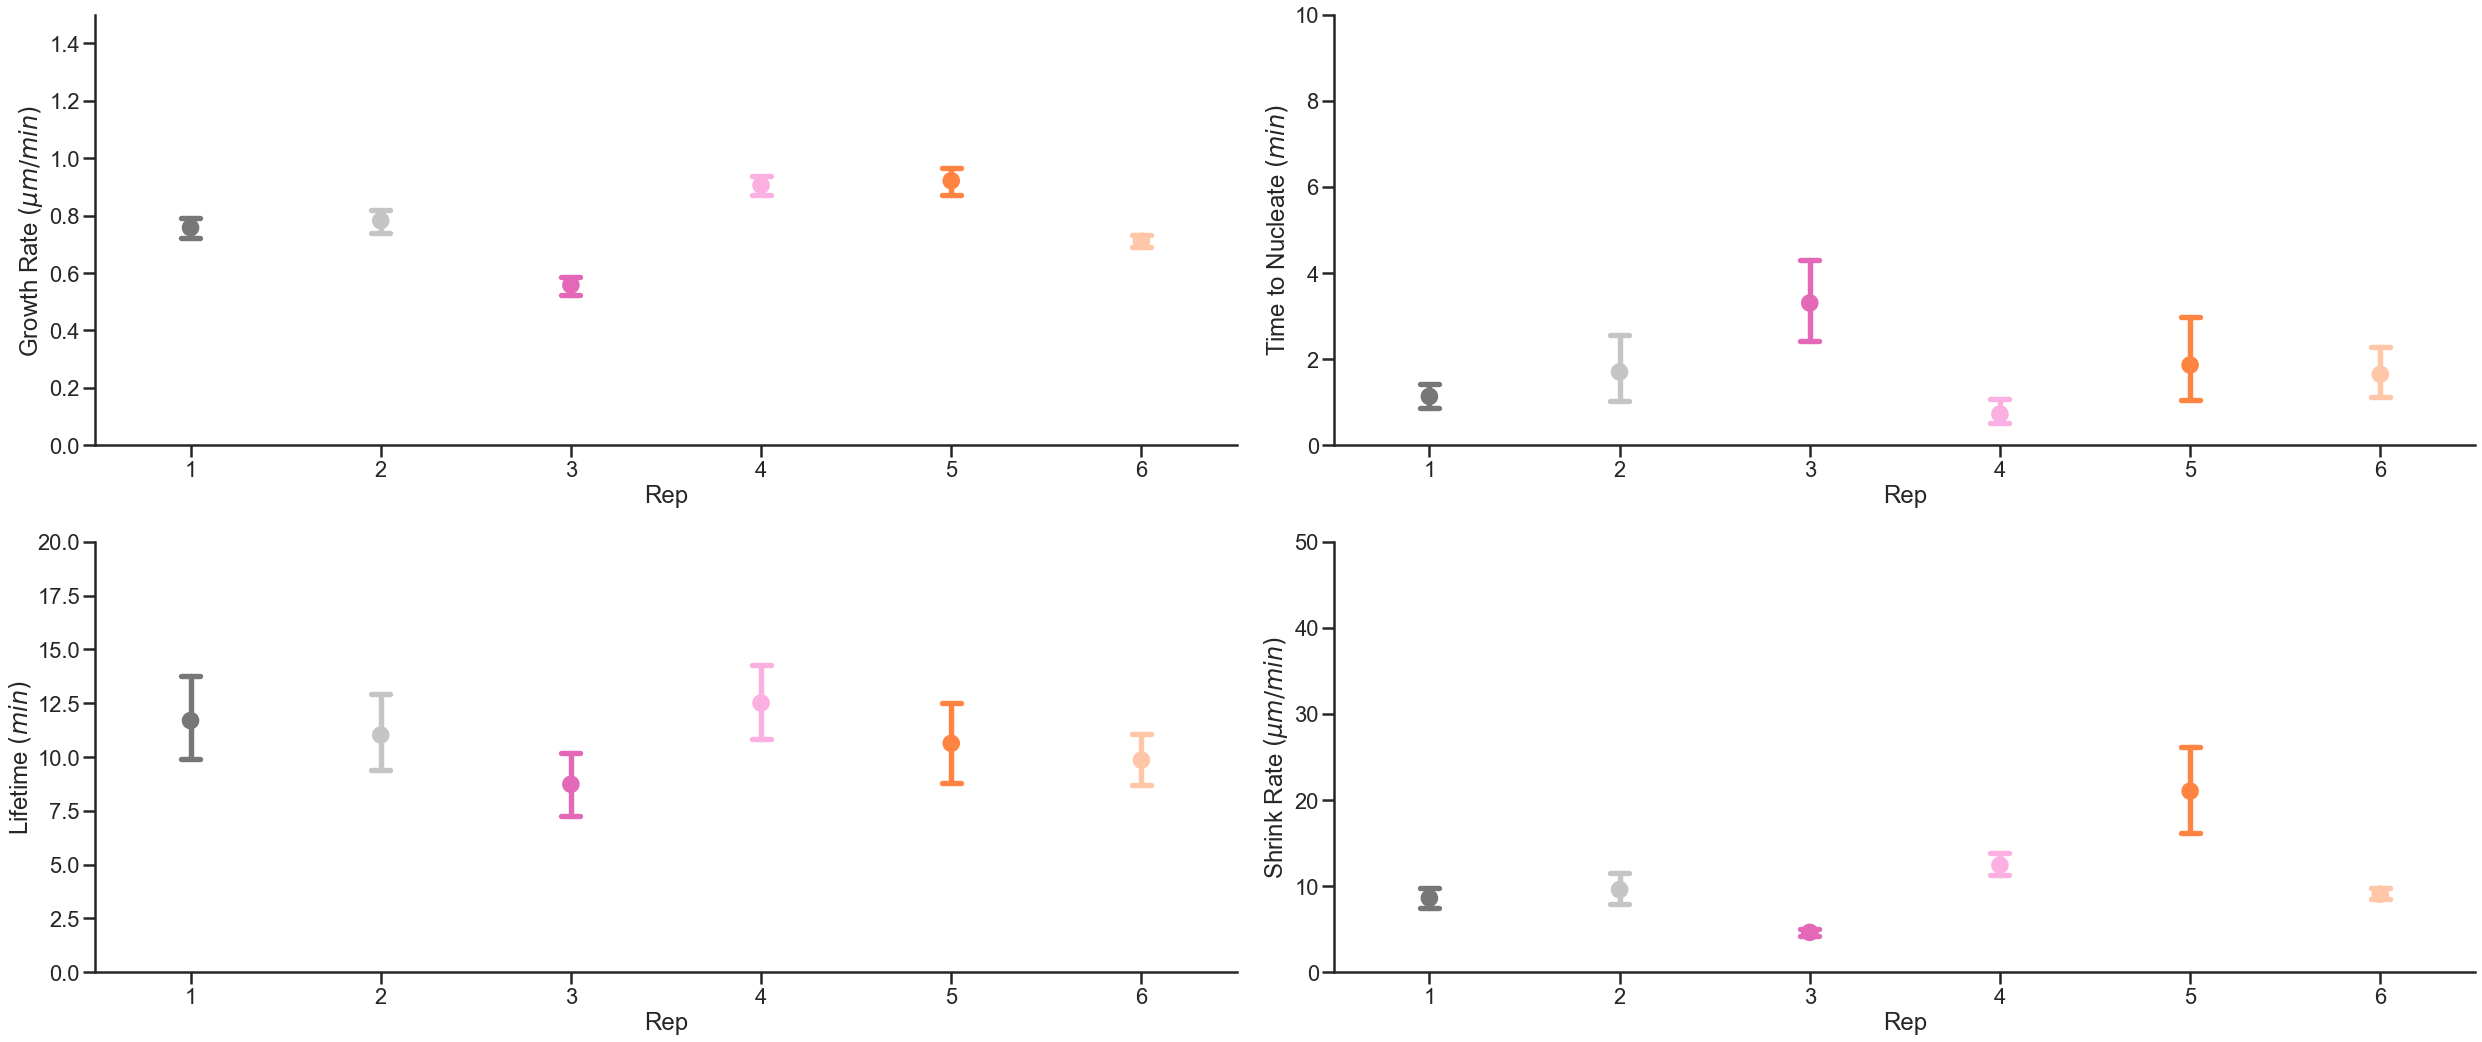

In [175]:
fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Rep', y=parameters[c],
                         err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
axs[0][0].set_ylim(0,1.5)
axs[1][0].set_ylim(0,20)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,50)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


# Rescues #

In [149]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():

                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
                    n =  selectdata[Type].count()

                    if n == 0:
                        continue
                        
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]
                

                #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], EBconc:[ebconc], 'Normalized Rescue': [rescue_values],
                         'n': [n]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

    return results

In [150]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Normalized Rescue,n
0,8,None,0,0,0.053872,297
0,8,None,0,20,0.009554,314
0,8,WT,60,0,0.126667,300
0,8,WT,60,20,0.004329,231
0,8,R76S,60,0,0.039130,230
0,8,R76S,60,20,0.008032,249
0,8,P191R,60,0,0.058943,492
0,8,P191R,60,20,0.004831,207


In [152]:
Rescuepalette = [grey00, cyan00, pink00, orange00]

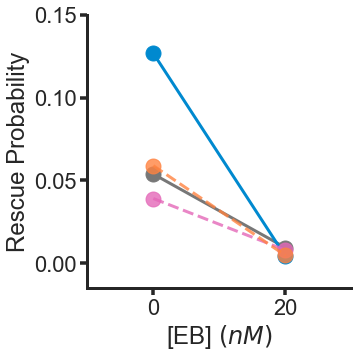

In [164]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(5.5,5.5))
#     plt.suptitle('Fitted pooled data', fontsize=30)


count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)][EBconc]

    y = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=Rescuepalette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=Rescuepalette[count],marker = 'o', ms=15, ls='--',alpha=0.8 )

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,0.15)
ax.set_xlim(-10,30)
ax.set_xticks(np.arange(0, 30,20))
ax.set_xlabel( EBconc)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
# plt.savefig(path.parents[0]/('Fit-Rescue_.jpg'))
plt.savefig(newmydir/('joint_graphsRescues_all.svg'))

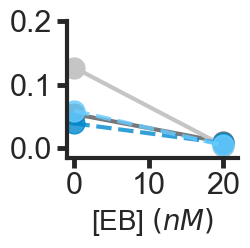

In [57]:
#rescale

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(3,3))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)][EBconc]

    y = rescues[ (rescues[tubulin]==8) & (rescues[Type]== dcxtype)]['Normalized Rescue']
    
    if dcxtype == 'None' or  dcxtype == 'WT':

        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    
    else:
        
        ax.plot(x , y ,color=palette[count],marker = 'o', ms=15, ls='--',alpha=0.8 )

    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,0.20)
ax.set_xlim(-1,22)
ax.set_xticks(np.arange(0, 30,10))
ax.set_yticks(np.arange(0, 0.21,0.1))
ax.set_xlabel( EBconc, fontsize=20)


#ax.set_title('Rescue')
# ax.set_ylabel('Rescue Probability')

sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})

# ax.set_title('Rescue')
# ax.set_ylabel('Rescue Probability', fontsize=20)

# ax.legend((Type_order),loc='upper right',title='DCX Type', title_fontsize=20, fontsize=15)
# fig.suptitle('[Tubulin] ' r'$= 8 \mu M$', fontsize=25)
plt.tight_layout()
# plt.savefig(path.parents[0]/('Fit-Rescue_.jpg'))
plt.savefig(newmydir/('joint_graphsRescues_inset.svg'))

# Lifetime Parameters #

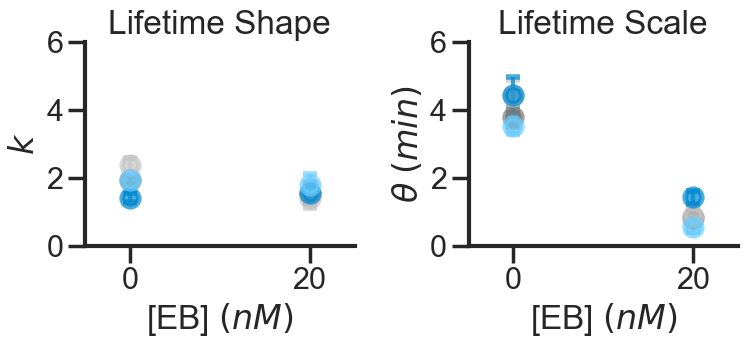

In [59]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(8,4))
#     plt.suptitle('Fitted pooled data', fontsize=30)
selectcoeff = ResultFit.dropna(subset=['Coefficient'])

count = 0
for dcxtype in data[Type].unique():
    
    dcxtype_DF = ResultFit[(ResultFit[Type]==dcxtype) & (ResultFit['Parameter']==Lifetime)
                           & (ResultFit[tubulin]==8)].dropna(subset=['Coefficient'])

    x = dcxtype_DF[(dcxtype_DF['Coefficient']==0)][EBconc].values
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==0)]['SE'].values

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4, alpha = 0.7, elinewidth=3,color=palette[count])
    
    y = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['Fit'].values
    yerr = dcxtype_DF[(dcxtype_DF['Coefficient']==1)]['SE'].values

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,alpha = 0.7,elinewidth=3,color=palette[count])
    
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlim(-5,25)
    ax[i].set_xlabel(EBconc)
    ax[i].set_xticks(np.arange(0, 25, 20))

ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


# ax[0].legend((Type_order),loc='upper right',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.svg'))